In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from plotnine import *

file_path = './commodity.csv'

# open the file for reading and automatically close it when exiting the "with" block
with open(file_path, 'r') as file:
    
    # we read the file with the read_csv method of pandas
    # and store the dataframe the method returns in df_names
    df_comm = pd.read_csv(file,index_col=['date'])

#df_comm['date'] = df_comm['date'].astype('datetime64[ns]')
df_comm.head()

,Commodity,Cash_Settlement,Three_month,LME_stock,Year,Month,Quarter
date,,,,,,,
2-Jan-08,Nickel,26505.0,26725.0,47940,2008,Jan,Qtr1
2-Jan-08,Copper,6666.0,6706.0,198925,2008,Jan,Qtr1
2-Jan-08,Aluminium,2365.5,2413.0,929450,2008,Jan,Qtr1
3-Jan-08,Nickel,28105.0,28400.0,47892,2008,Jan,Qtr1
3-Jan-08,Copper,6765.0,6818.0,198175,2008,Jan,Qtr1


In [2]:
df_alum = df_comm[df_comm['Commodity'] == "Aluminium"]
df_alum = df_alum[df_alum['Year'] >= 2014]

pd.options.display.float_format = '{:,.2f}'.format

del df_alum['Commodity']

df_alum['period'] = df_alum['Year'].astype(str) + " " + df_alum['Quarter']

df_alum['SMA_CS_10'] = df_alum.Cash_Settlement.rolling(10, min_periods=1).mean()
df_alum['SMA_CS_60'] = df_alum.Cash_Settlement.rolling(60, min_periods=1).mean()
df_alum['SMA_CS_200'] = df_alum.Cash_Settlement.rolling(200, min_periods=1).mean()
df_alum['SMA_3M_10'] = df_alum.Three_month.rolling(10, min_periods=1).mean()
df_alum['SMA__3M_60'] = df_alum.Three_month.rolling(60, min_periods=1).mean()
df_alum['SMA_3M_200'] = df_alum.Three_month.rolling(200, min_periods=1).mean()

df_alum.head()

,Cash_Settlement,Three_month,LME_stock,Year,Month,Quarter,period,SMA_CS_10,SMA_CS_60,SMA_CS_200,SMA_3M_10,SMA__3M_60,SMA_3M_200
date,,,,,,,,,,,,,
2-Jan-14,"1,755.50","1,802.50",5451800,2014,Jan,Qtr1,2014 Qtr1,"1,755.50","1,755.50","1,755.50","1,802.50","1,802.50","1,802.50"
3-Jan-14,"1,738.50","1,787.00",5459750,2014,Jan,Qtr1,2014 Qtr1,"1,747.00","1,747.00","1,747.00","1,794.75","1,794.75","1,794.75"
6-Jan-14,"1,717.50","1,762.00",5455400,2014,Jan,Qtr1,2014 Qtr1,"1,737.17","1,737.17","1,737.17","1,783.83","1,783.83","1,783.83"
7-Jan-14,"1,733.00","1,780.50",5451550,2014,Jan,Qtr1,2014 Qtr1,"1,736.12","1,736.12","1,736.12","1,783.00","1,783.00","1,783.00"
8-Jan-14,"1,736.50","1,782.50",5449825,2014,Jan,Qtr1,2014 Qtr1,"1,736.20","1,736.20","1,736.20","1,782.90","1,782.90","1,782.90"


In [3]:
df_nickel = df_comm[df_comm['Commodity'] == "Nickel"]
df_nickel = df_nickel[df_nickel['Year'] >= 2014]

pd.options.display.float_format = '{:,.2f}'.format

del df_nickel['Commodity']

df_nickel['period'] = df_nickel['Year'].astype(str) + " " + df_nickel['Quarter']

df_nickel['SMA_CS_10'] = df_nickel.Cash_Settlement.rolling(10, min_periods=1).mean()
df_nickel['SMA_CS_60'] = df_nickel.Cash_Settlement.rolling(60, min_periods=1).mean()
df_nickel['SMA_CS_200'] = df_nickel.Cash_Settlement.rolling(200, min_periods=1).mean()
df_nickel['SMA_3M_10'] = df_nickel.Three_month.rolling(10, min_periods=1).mean()
df_nickel['SMA__3M_60'] = df_nickel.Three_month.rolling(60, min_periods=1).mean()
df_nickel['SMA_3M_200'] = df_nickel.Three_month.rolling(200, min_periods=1).mean()

df_nickel.head()

,Cash_Settlement,Three_month,LME_stock,Year,Month,Quarter,period,SMA_CS_10,SMA_CS_60,SMA_CS_200,SMA_3M_10,SMA__3M_60,SMA_3M_200
date,,,,,,,,,,,,,
2-Jan-14,"13,905.00","13,980.00",261468,2014,Jan,Qtr1,2014 Qtr1,"13,905.00","13,905.00","13,905.00","13,980.00","13,980.00","13,980.00"
3-Jan-14,"13,870.00","13,920.00",260706,2014,Jan,Qtr1,2014 Qtr1,"13,887.50","13,887.50","13,887.50","13,950.00","13,950.00","13,950.00"
6-Jan-14,"13,570.00","13,640.00",260862,2014,Jan,Qtr1,2014 Qtr1,"13,781.67","13,781.67","13,781.67","13,846.67","13,846.67","13,846.67"
7-Jan-14,"13,480.00","13,550.00",260724,2014,Jan,Qtr1,2014 Qtr1,"13,706.25","13,706.25","13,706.25","13,772.50","13,772.50","13,772.50"
8-Jan-14,"13,445.00","13,505.00",260610,2014,Jan,Qtr1,2014 Qtr1,"13,654.00","13,654.00","13,654.00","13,719.00","13,719.00","13,719.00"


In [4]:
df_copper = df_comm[df_comm['Commodity'] == "Copper"]
df_copper = df_copper[df_copper['Year'] >= 2014]

pd.options.display.float_format = '{:,.2f}'.format

del df_copper['Commodity']

df_copper['period'] = df_copper['Year'].astype(str) + " " + df_copper['Quarter']

df_copper['SMA_CS_10'] = df_copper.Cash_Settlement.rolling(10, min_periods=1).mean()
df_copper['SMA_CS_60'] = df_copper.Cash_Settlement.rolling(60, min_periods=1).mean()
df_copper['SMA_CS_200'] = df_copper.Cash_Settlement.rolling(200, min_periods=1).mean()
df_copper['SMA_3M_10'] = df_copper.Three_month.rolling(10, min_periods=1).mean()
df_copper['SMA__3M_60'] = df_copper.Three_month.rolling(60, min_periods=1).mean()
df_copper['SMA_3M_200'] = df_copper.Three_month.rolling(200, min_periods=1).mean()

df_copper.head()

,Cash_Settlement,Three_month,LME_stock,Year,Month,Quarter,period,SMA_CS_10,SMA_CS_60,SMA_CS_200,SMA_3M_10,SMA__3M_60,SMA_3M_200
date,,,,,,,,,,,,,
2-Jan-14,"7,439.50","7,422.00",365700,2014,Jan,Qtr1,2014 Qtr1,"7,439.50","7,439.50","7,439.50","7,422.00","7,422.00","7,422.00"
3-Jan-14,"7,335.50","7,323.00",359075,2014,Jan,Qtr1,2014 Qtr1,"7,387.50","7,387.50","7,387.50","7,372.50","7,372.50","7,372.50"
6-Jan-14,"7,313.50","7,290.50",356125,2014,Jan,Qtr1,2014 Qtr1,"7,362.83","7,362.83","7,362.83","7,345.17","7,345.17","7,345.17"
7-Jan-14,"7,354.00","7,335.00",353075,2014,Jan,Qtr1,2014 Qtr1,"7,360.62","7,360.62","7,360.62","7,342.62","7,342.62","7,342.62"
8-Jan-14,"7,368.00","7,357.00",351675,2014,Jan,Qtr1,2014 Qtr1,"7,362.10","7,362.10","7,362.10","7,345.50","7,345.50","7,345.50"


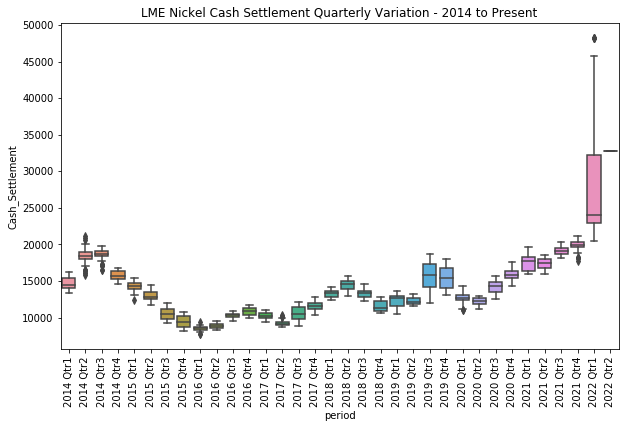

In [5]:
plt.figure(figsize=(10,6))
plt.title('LME Nickel Cash Settlement Quarterly Variation - 2014 to Present')
Ni_1 = sbn.boxplot(x="period", y="Cash_Settlement", data=df_nickel)
Ni_1 = Ni_1.set_xticklabels(Ni_1.get_xticklabels(), rotation=90)

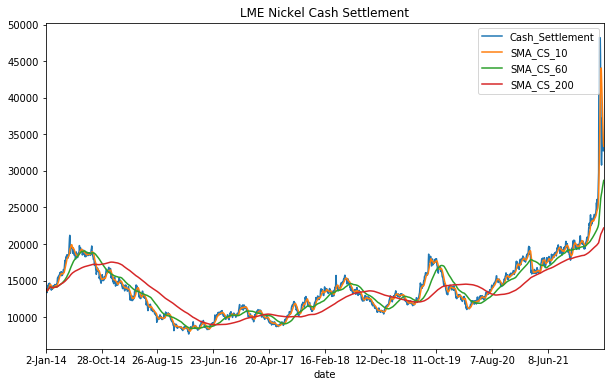

In [6]:
moving_av = ['Cash_Settlement','SMA_CS_10','SMA_CS_60','SMA_CS_200']

plot = df_nickel[moving_av].plot(figsize=(10,6))
plot.set_title("LME Nickel Cash Settlement")

ticks = np.arange(0,len(df_nickel.index),len(df_nickel.index)/10)
labels = df_nickel.index[ticks.astype(int)]

_ = plot.xaxis.set_ticks(ticks)
_ = plot.xaxis.set_ticklabels(labels)

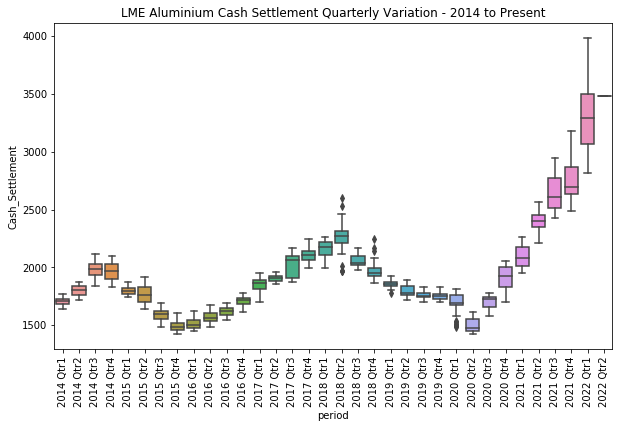

In [7]:
plt.figure(figsize=(10,6))
plt.title('LME Aluminium Cash Settlement Quarterly Variation - 2014 to Present')
Ni_1 = sbn.boxplot(x="period", y="Cash_Settlement", data=df_alum)
Ni_1 = Ni_1.set_xticklabels(Ni_1.get_xticklabels(), rotation=90)

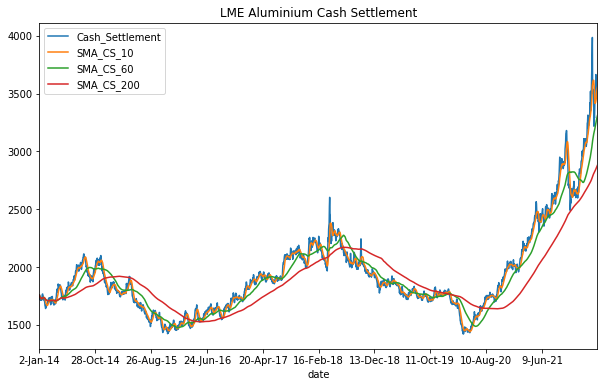

In [8]:
moving_av = ['Cash_Settlement','SMA_CS_10','SMA_CS_60','SMA_CS_200']

plot = df_alum[moving_av].plot(figsize=(10,6))
plot.set_title("LME Aluminium Cash Settlement")

ticks = np.arange(0,len(df_alum.index),len(df_alum.index)/10)
labels = df_alum.index[ticks.astype(int)]

_ = plot.xaxis.set_ticks(ticks)
_ = plot.xaxis.set_ticklabels(labels)

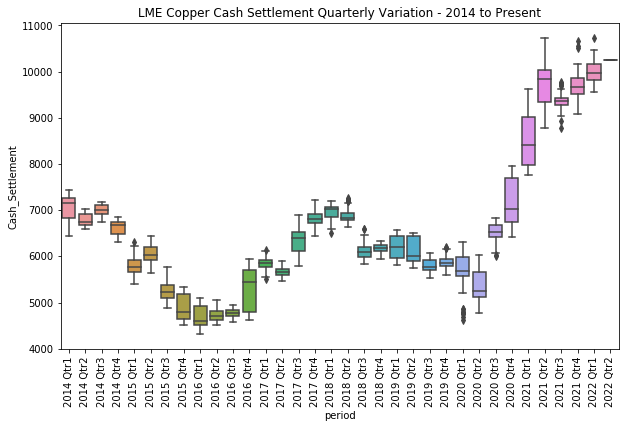

In [9]:
plt.figure(figsize=(10,6))
plt.title('LME Copper Cash Settlement Quarterly Variation - 2014 to Present')
Ni_1 = sbn.boxplot(x="period", y="Cash_Settlement", data=df_copper)
Ni_1 = Ni_1.set_xticklabels(Ni_1.get_xticklabels(), rotation=90)

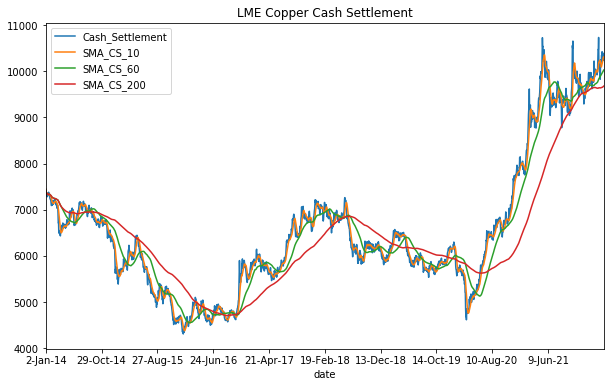

In [10]:
moving_av = ['Cash_Settlement','SMA_CS_10','SMA_CS_60','SMA_CS_200']

plot = df_copper[moving_av].plot(figsize=(10,6))
plot.set_title("LME Copper Cash Settlement")

ticks = np.arange(0,len(df_copper.index),len(df_copper.index)/10)
labels = df_copper.index[ticks.astype(int)]

_ = plot.xaxis.set_ticks(ticks)
_ = plot.xaxis.set_ticklabels(labels)